In [9]:
import plaidml.keras

plaidml.keras.install_backend()

import keras
import numpy as np 
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from matplotlib import pyplot as plt 
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.models import load_model
(x_train, y_train), (x_test, y_test) = mnist.load_data()



x_s_test, x_s_train = x_test, x_train





x_train, x_test= x_train.reshape(60000,28,28,1), x_test.reshape(10000,28,28,1)
 


num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


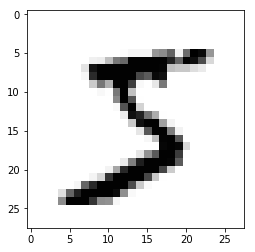

In [10]:
plt.imshow(x_s_train[0], cmap="Greys")

In [11]:
print(x_train[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [12]:
model = Sequential()


model.add(Conv2D(512, kernel_size=(3,3), activation = "relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation = "relu"))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(10, activation="softmax"))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 512)       5120      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 512)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 256)       1179904   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         295040    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 64)          73792     
__________

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
del model



model = load_model("cnnrebuild.h5")

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
59904/60000 [============================>.] - ETA: 0s - loss: 0.0085 - acc: 0.9980

INFO:plaidml:Analyzing Ops: 119 of 437 operations complete


60000/60000 [==============================] - 74s 1ms/step - loss: 0.0085 - acc: 0.9980 - val_loss: 0.0609 - val_acc: 0.9906
Epoch 2/20
60000/60000 [==============================] - 49s 809us/step - loss: 0.0099 - acc: 0.9974 - val_loss: 0.0579 - val_acc: 0.9915
Epoch 3/20
60000/60000 [==============================] - 48s 792us/step - loss: 0.0093 - acc: 0.9977 - val_loss: 0.0486 - val_acc: 0.9913
Epoch 4/20
60000/60000 [==============================] - 48s 804us/step - loss: 0.0094 - acc: 0.9977 - val_loss: 0.0653 - val_acc: 0.9863
Epoch 5/20
60000/60000 [==============================] - 48s 805us/step - loss: 0.0073 - acc: 0.9982 - val_loss: 0.0532 - val_acc: 0.9920
Epoch 6/20
60000/60000 [==============================] - 47s 791us/step - loss: 0.0086 - acc: 0.9983 - val_loss: 0.0482 - val_acc: 0.9914
Epoch 7/20
60000/60000 [==============================] - 48s 805us/step - loss: 0.0071 - acc: 0.9984 - val_loss: 0.0449 - val_acc: 0.9913
Epoch 8/20
60000/60000 [================

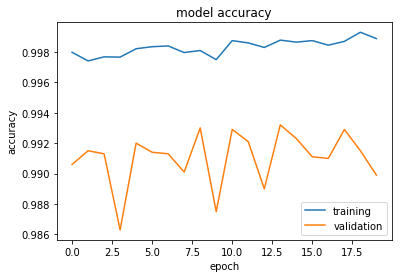

Test loss: 0.0691
Test accuracy: 0.99


In [15]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=20, verbose=1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [17]:
keras.backend.backend()

'plaidml'

In [16]:
model.save("cnnrebuild.h5")